1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

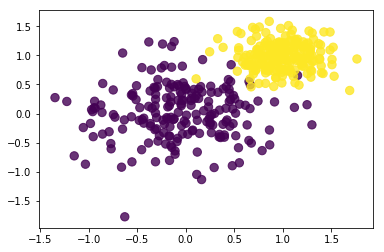

In [39]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

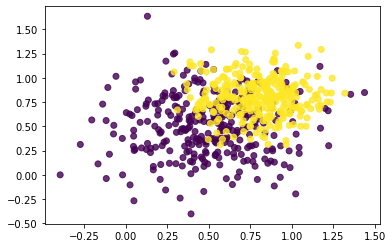

In [41]:
def generate_sets(size, mean1=0.5, stand_dev1=0.3, mean2=0.8, stand_dev2=0.2):
    x_1 = np.random.normal(mean1, stand_dev1, size)
    y_1 = np.random.normal(mean1, stand_dev1, size)
    color_1 = np.full(size, 0)
    
    x_2 = np.random.normal(mean2, stand_dev2, size)
    y_2 = np.random.normal(mean2, stand_dev2, size)
    color_2 = np.full(size,1)
    
    x = np.concatenate([x_1,x_2])
    y = np.concatenate([y_1,y_2])
    colors = np.concatenate([color_1,color_2])
    
    return x, y, colors

x, y, colors =generate_sets(300)

plt.scatter(x, y, c=colors, alpha=0.8)
plt.show()


2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

File = 
 {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])} 

Dataframe = 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns] 

Clean sample = 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


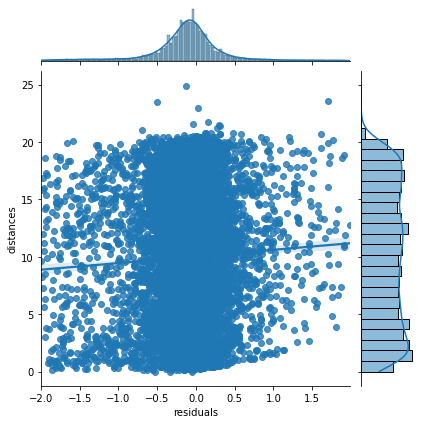

In [42]:
import pickle

file = pd.read_pickle('residuals_261.pkl')
print('File = \n', file, '\n')

#convert to dataframe
data = np.array(file, ndmin=1)[0]#the file is not 2 dimensions so change the dimension first
df = pd.DataFrame(data, columns=['residuals','distances'])
print('Dataframe = \n',df, '\n')

#clean the sample with residual absolute value <2
clean_df = df[abs(df['residuals'])<2] 
print('Clean sample = \n', clean_df )

#now plot with seaborn
import seaborn as sb
sb.jointplot(x='residuals', y='distances', data=clean_df, kind='reg')


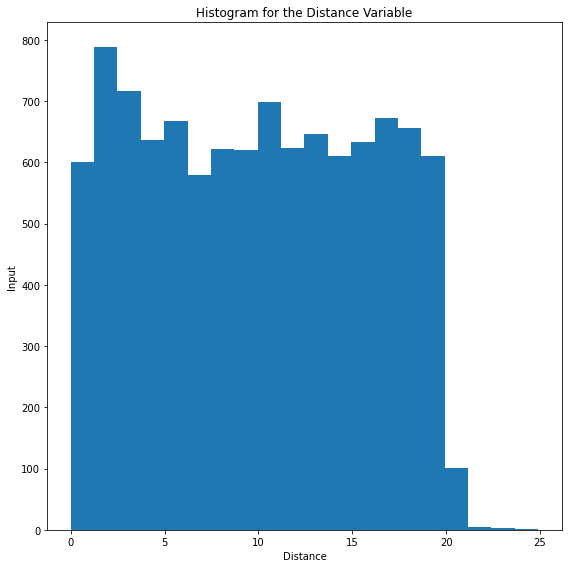

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
h, bins, _ = plt.hist (clean_df['distances'], bins=20)

ax.set_title('Histogram for the Distance Variable')
ax.set_xlabel('Distance')
ax.set_ylabel('Input')
fig.tight_layout()


x:  [ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775] 

y:  [-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714 -0.12857143] 

err_y:  [0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]


<ErrorbarContainer object of 3 artists>

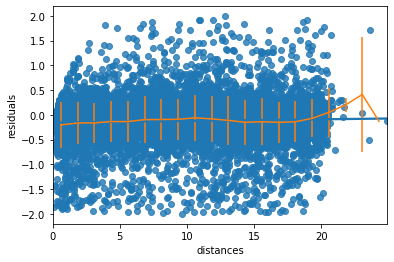

In [44]:
def stats():
    x = []
    y = []
    err_y = []
    for index in range(len(bins)-1) :
        left = bins[index]
        right = bins[index+1]
        
        center = (right - left) / 2 + left
        mean = clean_df[(clean_df['distances'] >= left) & (clean_df['distances'] <= right)]['residuals'].mean()
        std = clean_df[(clean_df['distances'] >= left) & (clean_df['distances'] <= right)]['residuals'].std()
        
        x.append(center)
        y.append(mean)
        err_y.append(std)
    
    x = np.array(x)
    y = np.array(y)
    err_y = np.array(err_y)
    
    return x, y, err_y

x, y, err_y= stats()

print('x: ', x, '\n')
print('y: ', y, '\n')
print('err_y: ', err_y)

ax = sb.regplot(x='distances', y='residuals', data=clean_df)
ax.errorbar(x, y, yerr=err_y)


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Sum of the Integral = 
 1999.9999999895115 

Histogram of the Integral = 
 198.5 

Factor = 
 0.09925000000052049
The new Gaussian = 
 198.50000000000003 equals to histogram


<function matplotlib.pyplot.show(close=None, block=None)>

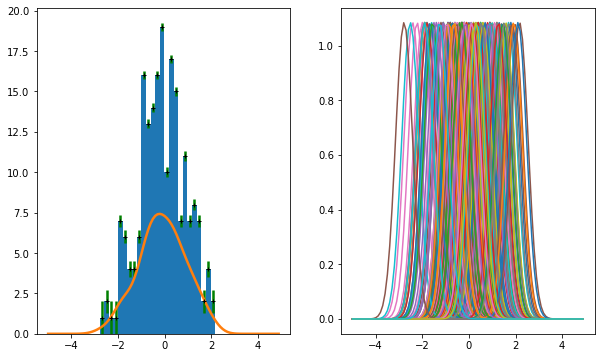

In [57]:
import scipy.stats as stats
import scipy
fig,axs = plt.subplots(1, 2, figsize=(10, 6))
N = 200
x = np.random.normal(0, 1, N)
val, bin_edge, _ =axs[0].hist(x, bins=25)

bin_center = np.array([0.5*(bin_edge[i] + bin_edge[i+1]) for i in range(0, len(bin_edge)-1)])
err_y = []
for i in range(len(val)):
    if val[i]!=0:
        err_y.append(1/np.sqrt(val[i]))
    else:
        err_y.append(0)

        fig, axs = plt.subplots(1, 2,figsize=(20, 12))

axs[0].errorbar(bin_center, val, yerr=err_y, fmt= "+k", ecolor="green", elinewidth = 2.5, markersize=4 )

x_axis = np.arange(-5, 5, 0.1)
total = 0
for n in x:
    sigma = 1.06*np.std(x)*(x.size**(-1/5))
    norm = stats.norm.pdf(x_axis, n, sigma)
    axs[1].plot(x_axis, norm)
    total+=norm

integral = scipy.integrate.trapz(total)
print("Sum of the Integral = \n", integral, "\n")
int_x = scipy.integrate.trapz(val)
print("Histogram of the Integral = \n", int_x,"\n")
factor = (int_x/integral)
print("Factor = \n", factor)

T = total[:] * factor
int_T = scipy.integrate.trapz(T)
print("The new Gaussian = \n", int_T, "equals to histogram")
axs[0].plot(x_axis, T, linewidth = 2.5)
plt.show
